In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
import datetime

startDate = datetime.datetime(2019, 1, 1)
endDate = datetime.datetime(2020, 12, 31)

tickers = ['GOOG', 'AAPL', 'AMZN']

for stock in tickers:
  globals()[stock] = yf.download(stock, start=startDate, end=endDate)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
company_list = [GOOG, AAPL, AMZN]
company_name = ['Google', 'Apple', 'Amazon']

for company, com_name in zip(company_list, company_name):
  company["company_name"] = com_name

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

df = pd.concat(company_list, axis=0)
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2019-01-02,50.828499,52.616001,50.785500,52.292500,52.292500,30652000,Google
2019-01-03,52.049999,52.848999,50.703499,50.803001,50.803001,36822000,Google
2019-01-04,51.629501,53.542000,51.370899,53.535500,53.535500,41878000,Google
2019-01-07,53.575001,53.700001,52.737999,53.419498,53.419498,39638000,Google
2019-01-08,53.805500,54.228001,53.026501,53.813999,53.813999,35298000,Google


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1512 entries, 2019-01-02 to 2020-12-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1512 non-null   float64
 1   High          1512 non-null   float64
 2   Low           1512 non-null   float64
 3   Close         1512 non-null   float64
 4   Adj Close     1512 non-null   float64
 5   Volume        1512 non-null   int64  
 6   company_name  1512 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 94.5+ KB


In [ ]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2019-01-02 to 2020-12-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          504 non-null    float64
 1   High          504 non-null    float64
 2   Low           504 non-null    float64
 3   Close         504 non-null    float64
 4   Adj Close     504 non-null    float64
 5   Volume        504 non-null    int64  
 6   company_name  504 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.5+ KB


In [ ]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2019-01-02 to 2020-12-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          504 non-null    float64
 1   High          504 non-null    float64
 2   Low           504 non-null    float64
 3   Close         504 non-null    float64
 4   Adj Close     504 non-null    float64
 5   Volume        504 non-null    int64  
 6   company_name  504 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.5+ KB


## Closing Price

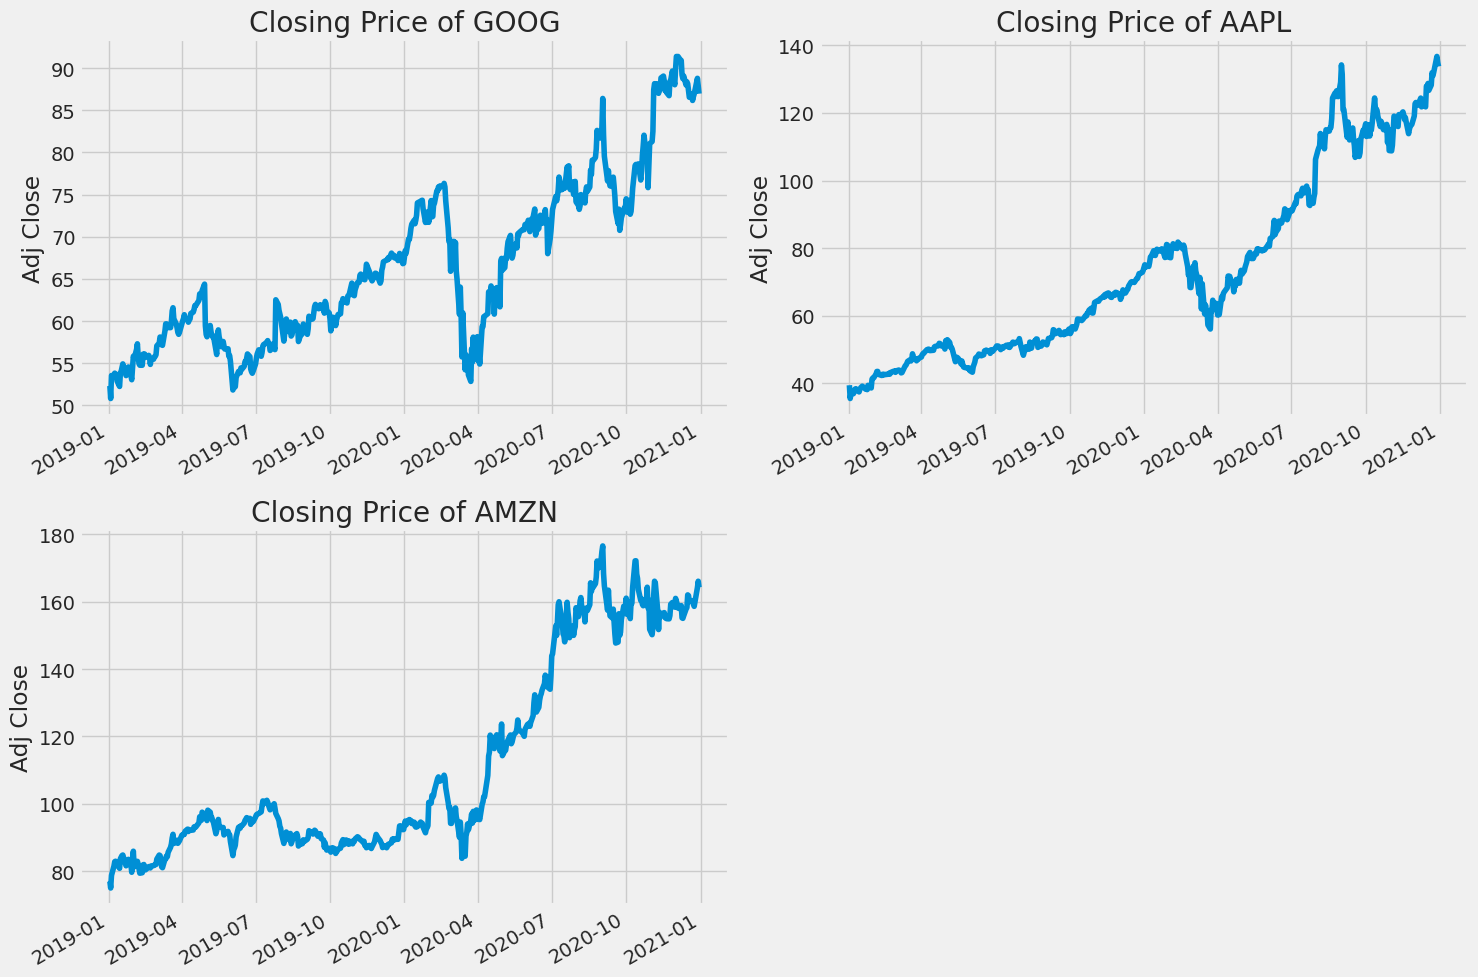

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tickers[i-1]}")

plt.tight_layout()

## Volume of Sales

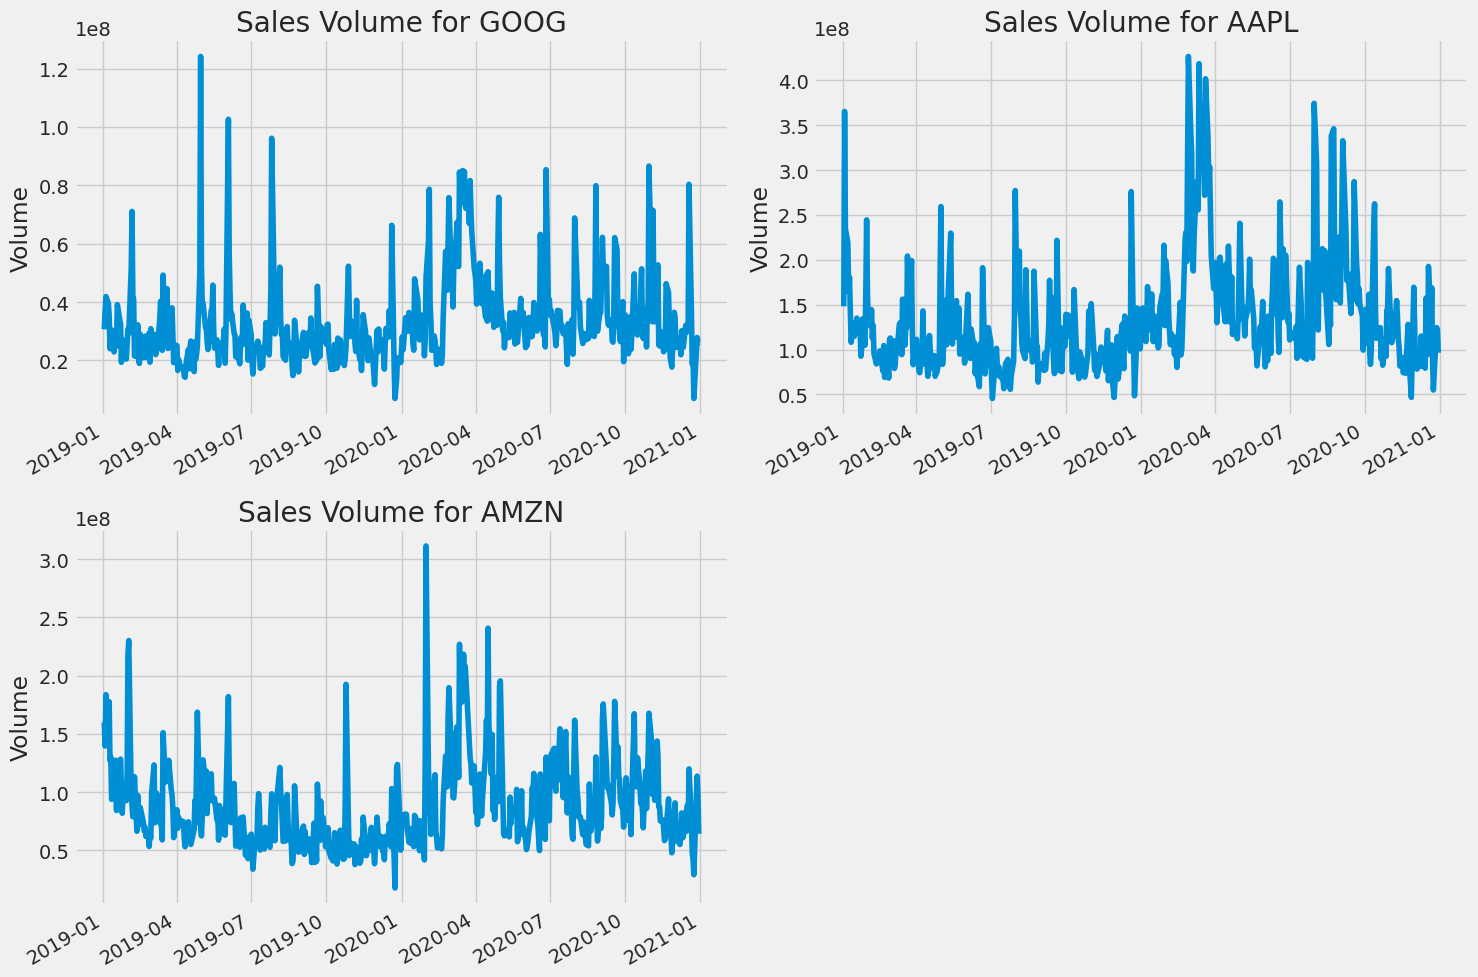

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tickers[i - 1]}")

plt.tight_layout()

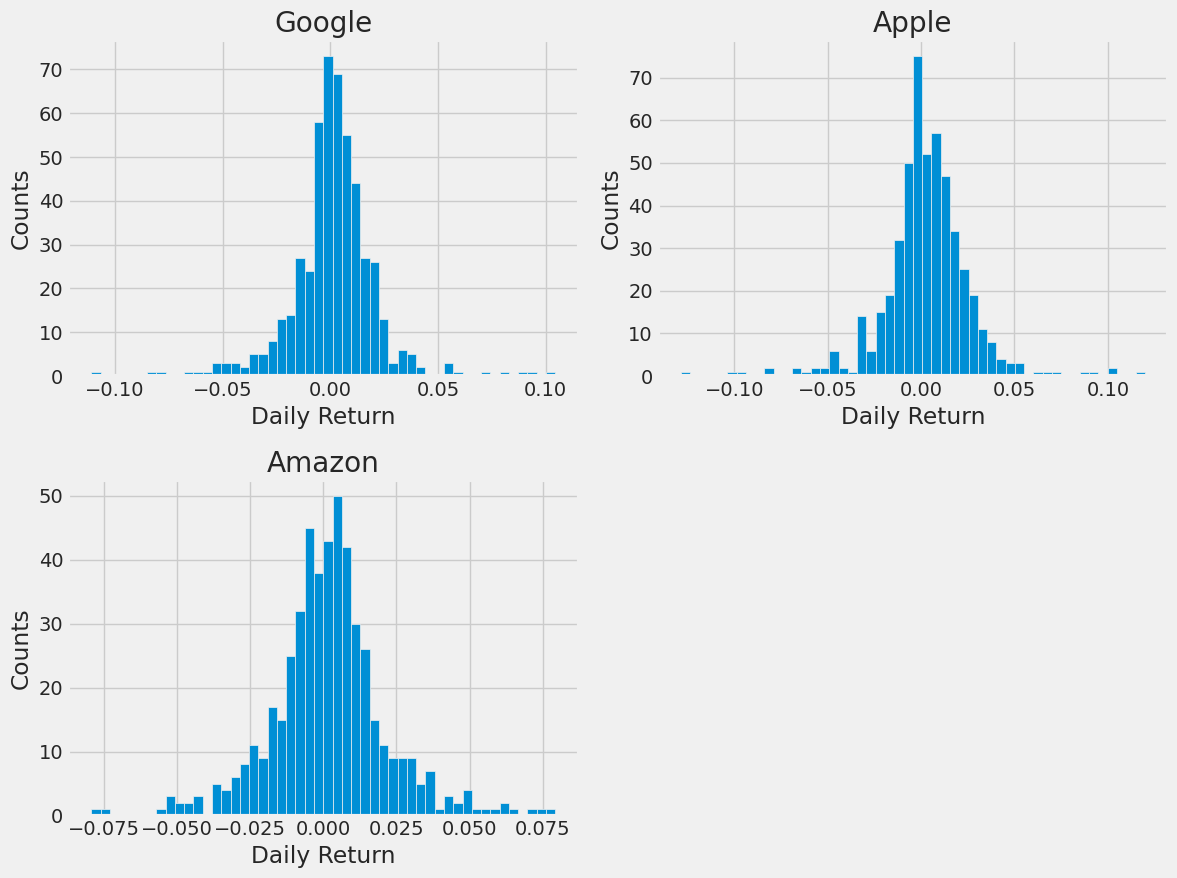

In [ ]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [ ]:
closing_df = yf.download(tickers, start=startDate, end=endDate)['Adj Close']

[*********************100%%**********************]  3 of 3 completed


In [ ]:
tech_rets = closing_df.pct_change()
tech_rets.head()
# % Change in Closing_df

Ticker,AAPL,AMZN,GOOG
Date,,,
2019-01-02,NaN,NaN,NaN
2019-01-03,-0.099608,-0.025241,-0.028484
2019-01-04,0.042689,0.050064,0.053786
2019-01-07,-0.002226,0.034353,-0.002167
2019-01-08,0.019063,0.016612,0.007385


### Tech Return pairplot with all the Companies

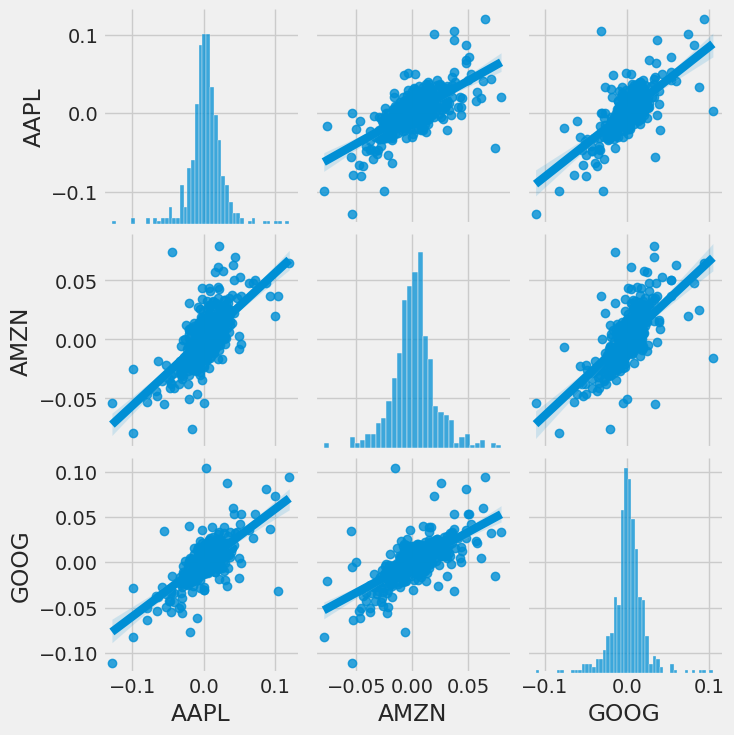

In [ ]:
sns.pairplot(tech_rets, kind='reg')

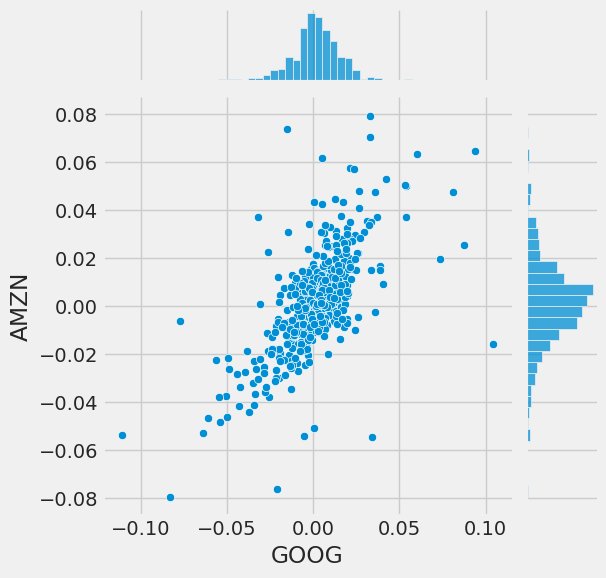

In [ ]:
sns.jointplot(x='GOOG', y='AMZN', data=tech_rets, kind='scatter')

### Correlation between Stock Return and Close Price

Text(0.5, 1.0, 'Correlation of stock return')

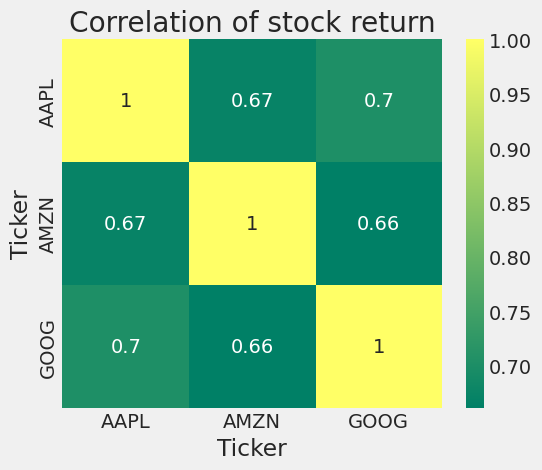

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

Text(0.5, 1.0, 'Correlation of stock close price')

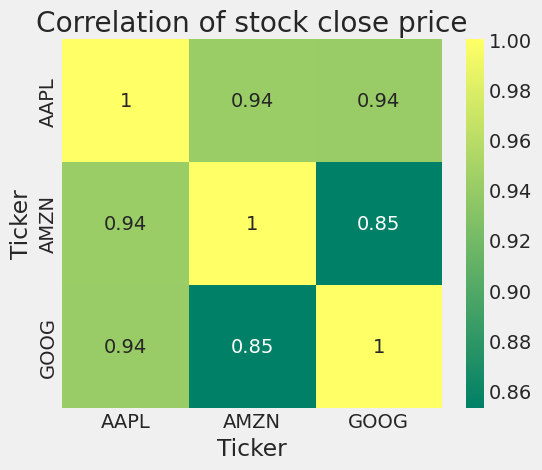

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock close price')

Text(0.5, 1.0, 'Correlation of stock close price')

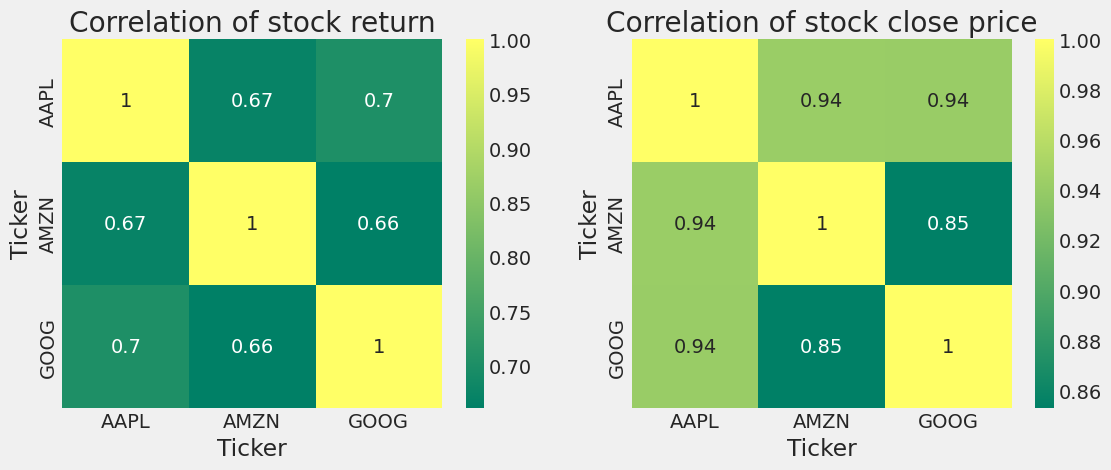

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock close price')

### Predicting

In [ ]:
data = yf.download(tickers, start='2023-01-01', end='2024-02-01')

[*********************100%%**********************]  3 of 3 completed


In [ ]:
data

Price        Adj Close                               Close              \
Ticker            AAPL        AMZN        GOOG        AAPL        AMZN   
Date                                                                     
2023-01-03  124.216301   85.820000   89.699997  125.070000   85.820000   
2023-01-04  125.497498   85.139999   88.709999  126.360001   85.139999   
2023-01-05  124.166641   83.120003   86.769997  125.019997   83.120003   
2023-01-06  128.735245   86.080002   88.160004  129.619995   86.080002   
2023-01-09  129.261627   87.360001   88.800003  130.149994   87.360001   
...                ...         ...         ...         ...         ...   
2024-01-25  193.922546  157.750000  153.639999  194.169998  157.750000   
2024-01-26  192.174774  159.119995  153.789993  192.419998  159.119995   
2024-01-29  191.485657  161.259995  154.839996  191.729996  161.259995   
2024-01-30  187.800354  159.000000  153.050003  188.039993  159.000000   
2024-01-31  184.164993  155.199997  141.800003  184.399994  155.199997   

Price                         High                                 Low  \
Ticker            GOOG        AAPL        AMZN        GOOG        AAPL   
Date                                                                     
2023-01-03   89.699997  130.899994   86.959999   91.550003  124.169998   
2023-01-04   88.709999  128.660004   86.980003   91.239998  125.080002   
2023-01-05   86.769997  127.769997   85.419998   88.209999  124.760002   
2023-01-06   88.160004  130.289993   86.400002   88.470001  124.889999   
2023-01-09   88.800003  133.410004   89.480003   90.830002  129.889999   
...                ...         ...         ...         ...         ...   
2024-01-25  153.639999  196.270004  158.509995  154.759995  193.110001   
2024-01-26  153.789993  194.759995  160.720001  154.110001  191.940002   
2024-01-29  154.839996  192.199997  161.289993  155.199997  189.580002   
2024-01-30  153.050003  191.800003  161.729996  155.039993  187.470001   
2024-01-31  141.800003  187.100006  159.009995  145.589996  184.350006   

Price                                     Open                          \
Ticker            AMZN        GOOG        AAPL        AMZN        GOOG   
Date                                                                     
2023-01-03   84.209999   89.019997  130.279999   85.459999   89.830002   
2023-01-04   83.360001   87.800003  126.889999   86.550003   91.010002   
2023-01-05   83.070000   86.559998  127.129997   85.330002   88.070000   
2023-01-06   81.430000   85.570000  126.010002   83.029999   87.360001   
2023-01-09   87.080002   88.580002  130.470001   87.459999   89.195000   
...                ...         ...         ...         ...         ...   
2024-01-25  154.550003  151.220001  195.220001  156.949997  151.740005   
2024-01-26  157.910004  152.800003  194.270004  158.419998  152.869995   
2024-01-29  158.899994  152.919998  192.009995  159.339996  153.639999   
2024-01-30  158.490005  152.774994  190.940002  160.699997  154.009995   
2024-01-31  154.809998  141.550003  187.039993  157.000000  145.389999   

Price          Volume                      
Ticker           AAPL      AMZN      GOOG  
Date                                       
2023-01-03  112117500  76706000  20738500  
2023-01-04   89113600  68885100  27046500  
2023-01-05   80962700  67930800  23136100  
2023-01-06   87754700  83303400  26612600  
2023-01-09   70790800  65266100  22996700  
...               ...       ...       ...  
2024-01-25   54822100  43638600  21495100  
2024-01-26   44594000  51047400  19494500  
2024-01-29   47145600  45270400  20909300  
2024-01-30   55859400  45207400  26578900  
2024-01-31   55467800  50284400  43908600  

[271 rows x 18 columns]

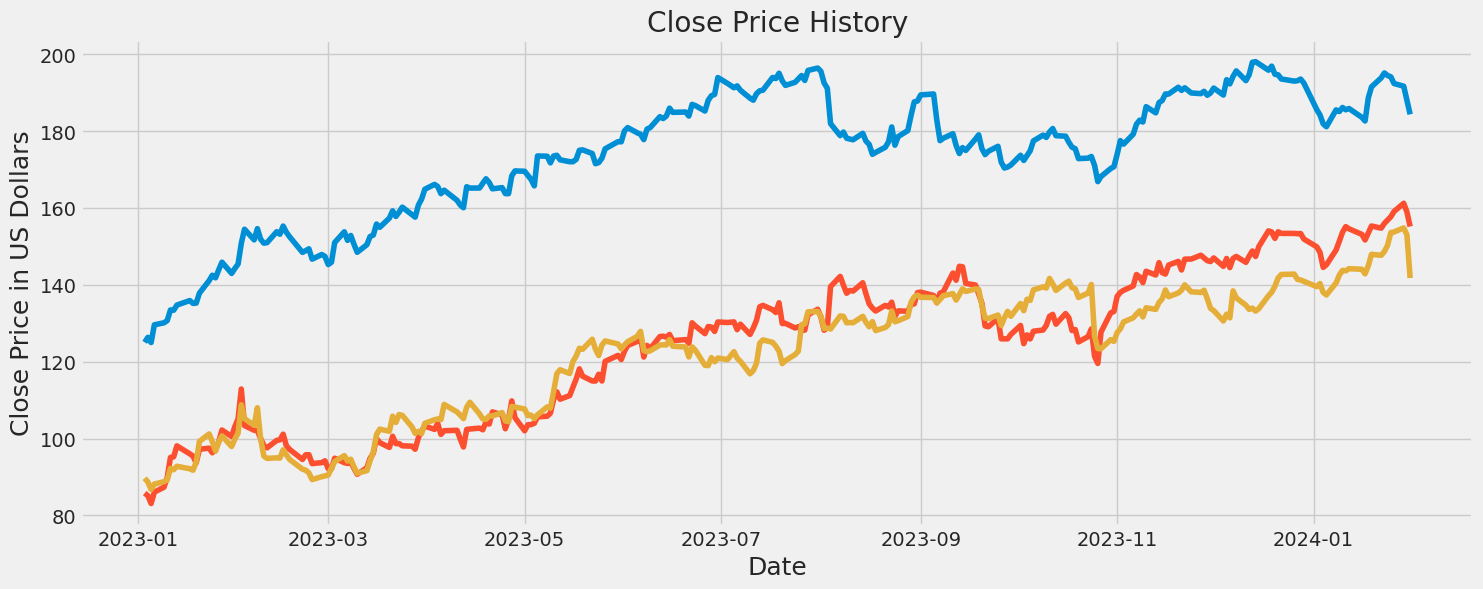

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in US Dollars', fontsize=18)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def print_regression_score(clf, X_train, y_train, X_test, y_test):
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)

    def clip_percentage(value):
        return np.clip(value * 100, 0, 100)

    print("Train Results:\n===================")
    print("Mean Absolute Error (MAE) on train set:", clip_percentage(mean_absolute_error(y_train, train_pred)), "%")
    print("Mean Squared Error (MSE) on train set:", clip_percentage(mean_squared_error(y_train, train_pred)), "%")
    print("Root Mean Squared Error (RMSE) on train set:", clip_percentage(np.sqrt(mean_squared_error(y_train, train_pred))), "%")
    print("R-squared (R2) on train set:", clip_percentage(r2_score(y_train, train_pred)), "%")

    print("\nTest Results:\n===================")
    print("Mean Absolute Error (MAE) on test set:", clip_percentage(mean_absolute_error(y_test, test_pred)), "%")
    print("Mean Squared Error (MSE) on test set:", clip_percentage(mean_squared_error(y_test, test_pred)), "%")
    print("Root Mean Squared Error (RMSE) on test set:", clip_percentage(np.sqrt(mean_squared_error(y_test, test_pred))), "%")
    print("R-squared (R2) on test set:", clip_percentage(r2_score(y_test, test_pred)), "%")

In [ ]:
print(data.columns)

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'AMZN'),
            ('Adj Close', 'GOOG'),
            (    'Close', 'AAPL'),
            (    'Close', 'AMZN'),
            (    'Close', 'GOOG'),
            (     'High', 'AAPL'),
            (     'High', 'AMZN'),
            (     'High', 'GOOG'),
            (      'Low', 'AAPL'),
            (      'Low', 'AMZN'),
            (      'Low', 'GOOG'),
            (     'Open', 'AAPL'),
            (     'Open', 'AMZN'),
            (     'Open', 'GOOG'),
            (   'Volume', 'AAPL'),
            (   'Volume', 'AMZN'),
            (   'Volume', 'GOOG')],
           names=['Price', 'Ticker'])


## Training Datasets

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('Close', axis=1)
y_AAPL = data['Close']['AAPL']

X_train_AAPL, X_test_AAPL, y_train_AAPL, y_test_AAPL = train_test_split(X, y_AAPL, test_size=0.6, random_state=42)

In [ ]:
print(y_train_AAPL.isnull().sum())

0


### AAPL Prediction

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rand_forest_AAPL = RandomForestRegressor(n_estimators=300, random_state=42)
rand_forest_AAPL.fit(X_train_AAPL, y_train_AAPL)

RandomForestRegressor(n_estimators=300, random_state=42)

In [ ]:
print_regression_score(rand_forest_AAPL, X_train_AAPL, y_train_AAPL, X_test_AAPL, y_test_AAPL)

Train Results:
Mean Absolute Error (MAE) on train set: 26.99594568323207 %
Mean Squared Error (MSE) on train set: 16.131631890668796 %
Root Mean Squared Error (RMSE) on train set: 40.164202831213764 %
R-squared (R2) on train set: 99.94441719820409 %

Test Results:
Mean Absolute Error (MAE) on test set: 57.078343553289514 %
Mean Squared Error (MSE) on test set: 69.92261292614363 %
Root Mean Squared Error (RMSE) on test set: 83.61974224197515 %
R-squared (R2) on test set: 99.76398968397044 %


In [ ]:
from sklearn.metrics import mean_squared_error

train_score = mean_squared_error(y_train_AAPL, rand_forest_AAPL.predict(X_train_AAPL))
test_score = mean_squared_error(y_test_AAPL, rand_forest_AAPL.predict(X_test_AAPL))

results_df = pd.DataFrame()

results_df2 = pd.DataFrame(data=[["AAPL", train_score * 100, test_score * 100]],
                             columns=['Model', 'Training MSE %', 'Testing MSE %'])

results_df = results_df.append(results_df2, ignore_index=True)
results_df

<ipython-input-27-9e2b804b2bed>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df2, ignore_index=True)


,Model,Training MSE %,Testing MSE %
0,AAPL,16.131632,69.922613


### GOOG Prediction

In [ ]:
X = data.drop('Close', axis=1)
y_GOOG = data['Close']['GOOG']

X_train_GOOG, X_test_GOOG, y_train_GOOG, y_test_GOOG = train_test_split(X, y_GOOG, test_size=0.6, random_state=42)

rand_forest_GOOG = RandomForestRegressor(n_estimators=300, random_state=42)
rand_forest_GOOG.fit(X_train_GOOG, y_train_GOOG)

print_regression_score(rand_forest_GOOG, X_train_GOOG, y_train_GOOG, X_test_GOOG, y_test_GOOG)

Train Results:
Mean Absolute Error (MAE) on train set: 31.932229454134713 %
Mean Squared Error (MSE) on train set: 24.62566492162726 %
Root Mean Squared Error (RMSE) on train set: 49.62425306402834 %
R-squared (R2) on train set: 99.91066230186667 %

Test Results:
Mean Absolute Error (MAE) on test set: 69.65337253250715 %
Mean Squared Error (MSE) on test set: 100.0 %
Root Mean Squared Error (RMSE) on test set: 100.0 %
R-squared (R2) on test set: 99.64612496213788 %


In [ ]:
train_score = mean_squared_error(y_train_GOOG, rand_forest_GOOG.predict(X_train_GOOG))
test_score = mean_squared_error(y_test_GOOG, rand_forest_GOOG.predict(X_test_GOOG))

results_df2 = pd.DataFrame(data=[["GOOG", train_score * 100, test_score * 100]],
                             columns=['Model', 'Training MSE %', 'Testing MSE %'])

results_df = results_df.append(results_df2, ignore_index=True)
results_df

<ipython-input-29-c8f8857f709e>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df2, ignore_index=True)


,Model,Training MSE %,Testing MSE %
0,AAPL,16.131632,69.922613
1,GOOG,24.625665,109.554247


### AMZN Prediction

In [ ]:
X = data.drop('Close', axis=1)
y_AMZN = data['Close']['AMZN']

X_train_AMZN, X_test_AMZN, y_train_AMZN, y_test_AMZN = train_test_split(X, y_AMZN, test_size=0.6, random_state=42)

rand_forest_AMZN = RandomForestRegressor(n_estimators=300, random_state=42)
rand_forest_AMZN.fit(X_train_AMZN, y_train_AMZN)

print_regression_score(rand_forest_AMZN, X_train_AMZN, y_train_AMZN, X_test_AMZN, y_test_AMZN)

Train Results:
Mean Absolute Error (MAE) on train set: 29.36139151490768 %
Mean Squared Error (MSE) on train set: 17.85401921700812 %
Root Mean Squared Error (RMSE) on train set: 42.254016633934484 %
R-squared (R2) on train set: 99.95620229034223 %

Test Results:
Mean Absolute Error (MAE) on test set: 66.82362699606182 %
Mean Squared Error (MSE) on test set: 94.43691391860098 %
Root Mean Squared Error (RMSE) on test set: 97.17865707993755 %
R-squared (R2) on test set: 99.76478789046298 %


In [ ]:
train_score = mean_squared_error(y_train_AMZN, rand_forest_AMZN.predict(X_train_AMZN))
test_score = mean_squared_error(y_test_AMZN, rand_forest_AMZN.predict(X_test_AMZN))

results_df2 = pd.DataFrame(data=[["AMZN", train_score * 100, test_score * 100]],
                             columns=['Model', 'Training MSE %', 'Testing MSE %'])

results_df = results_df.append(results_df2, ignore_index=True)
results_df

<ipython-input-31-e4be3b43ab49>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df2, ignore_index=True)


,Model,Training MSE %,Testing MSE %
0,AAPL,16.131632,69.922613
1,GOOG,24.625665,109.554247
2,AMZN,17.854019,94.436914
